# Demo: Normal Distribution of Stock Ticker Data

This program retrieves stock price data using the Alpaca API and plots the data using Pandas. These plots demonstrate the distribution of daily stock closing prices compared to the expected normal probability distribution. 

<font color='red'>Comment</font>

The main takeaway here is the visualizations at the end.

## Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
import pathlib
#load_dotenv()  # for mac
home = pathlib.Path.home() / ".env"  # for pc 1/2
load_dotenv(dotenv_path=home)  # for pc 2/2

%matplotlib inline

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Get 1 Year's Worth of Stock Price Data via Alpaca API Call and Read in as DataFrame 

<font color='red'>Comment</font>

Limit 1000 is max.

In [5]:
# Set the Tesla and Coca-Cola tickers
ticker = ["TSLA","KO"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2020-09-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-01", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Tesla and Coca-Cola
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head(10)

KO                                     TSLA  \
                             open     high    low  close    volume    open   
time                                                                         
2020-09-01 00:00:00-04:00  49.310  49.3500  48.83  49.12  22661628  502.14   
2020-09-02 00:00:00-04:00  49.360  51.3600  49.36  51.18  45640208  478.99   
2020-09-03 00:00:00-04:00  51.400  52.1378  50.10  50.48  38000906  407.23   
2020-09-04 00:00:00-04:00  50.940  51.4650  50.28  51.04  33605454  402.81   
2020-09-08 00:00:00-04:00  50.930  51.0400  49.36  49.80  30354492  356.00   
2020-09-09 00:00:00-04:00  49.600  50.7550  49.55  50.18  26430643  356.60   
2020-09-10 00:00:00-04:00  50.215  50.6750  49.95  50.00  23666677  382.40   
2020-09-11 00:00:00-04:00  50.400  51.2000  50.10  51.05  31287294  381.94   
2020-09-14 00:00:00-04:00  50.970  51.2300  50.57  50.70  18274538  380.95   
2020-09-15 00:00:00-04:00  51.000  51.3800  50.84  51.05   9341716  436.56   

                                                                  
                             high       low     close     volume  
time                                                              
2020-09-01 00:00:00-04:00  502.49  470.5100  475.0400   81257715  
2020-09-02 00:00:00-04:00  479.04  405.1206  447.2450   92367647  
2020-09-03 00:00:00-04:00  431.80  402.0000  407.0000   80478522  
2020-09-04 00:00:00-04:00  428.00  372.0201  417.9307  101195492  
2020-09-08 00:00:00-04:00  368.74  329.8800  330.0200  103446741  
2020-09-09 00:00:00-04:00  369.00  341.5100  366.2100   73161075  
2020-09-10 00:00:00-04:00  398.99  360.5600  370.5000   69988917  
2020-09-11 00:00:00-04:00  382.50  360.5000  372.4101   58016059  
2020-09-14 00:00:00-04:00  420.00  373.3000  419.7650   78741916  
2020-09-15 00:00:00-04:00  461.94  430.7000  449.3800   93194161

## Pick closing prices and compute the daily returns

<font color='red'>Comment</font>

We only want closing prices.

In [6]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["KO"] = df_ticker["KO"]["close"]
df_closing_prices["TSLA"] = df_ticker["TSLA"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,KO,TSLA
2020-09-02,0.041938,-0.058511
2020-09-03,-0.013677,-0.089984
2020-09-04,0.011094,0.026857
2020-09-08,-0.024295,-0.210348
2020-09-09,0.007631,0.109660
2020-09-10,-0.003587,0.011715
2020-09-11,0.021000,0.005155
2020-09-14,-0.006856,0.127158
2020-09-15,0.006903,0.070551
2020-09-16,-0.004897,-0.016957


In [7]:
# Generate descriptive statistics
df_daily_returns.describe()

,KO,TSLA
count,252.000000,252.000000
mean,0.000633,0.002516
std,0.011303,0.039687
min,-0.038485,-0.210348
25%,-0.004713,-0.020118
50%,0.000937,0.002183
75%,0.006945,0.023407
max,0.062879,0.196476


<font color='red'>Comment</font>

The std shows us how far values are away from the mean. It also reflects how "wide" or the distributions [kurtosis](https://www.investopedia.com/terms/k/kurtosis.asp), or peaked-ness/pointiness. We've not talked about kurtosis, but it is highly relevant!

### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

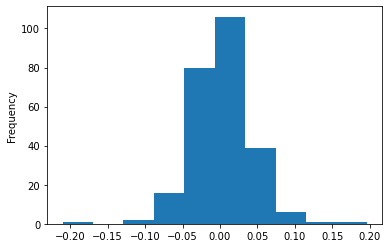

In [10]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
# bin charts really affect presentation
df_daily_returns["TSLA"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

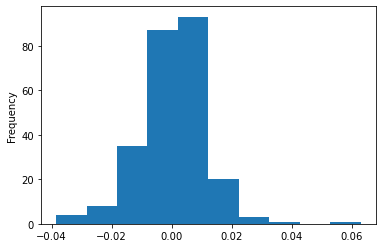

In [8]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
df_daily_returns["KO"].plot.hist()
# this one is a bit more granular, more specific

<font color='red'>Comment</font>

See the bell?

<AxesSubplot:ylabel='Density'>

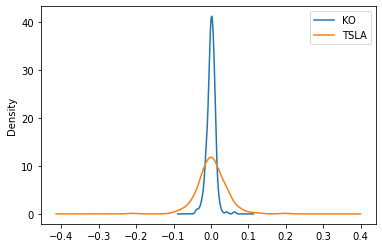

In [10]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
# this uses kernel smoothers - result is more helpful as far as big picture.
df_daily_returns.plot.density()

<font color='red'>Comment</font>

"Kernel smoothers" allow us to take bins and transform them into smooth lines.

Either way, the visuals help us make educated guesses about future stock returns.